# Multiple Linear Regression Analysis 
This script performs Multiple Linear Regression to predict Co2 emissions based on engine size and fuel consumption using Vehicle dataset.

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import preprocessing

In [87]:
# Reading the data containing the fuel consumption and emissions of various cars
df = pd.read_csv('D:\\Learning\\IBM Data Science\\Data\\Fuel_Consumption_Co2.csv')

# Drop categorical columns that are not needed for regression analysis
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'TRANSMISSION', 'FUELTYPE', 'VEHICLECLASS'], axis=1)
print("Dataframe Correlation metrics:", df.corr())

# Drop categorical columns that are highlighted correlated or redundant
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'], axis=1)
print("Dataframe after dropping Correlated/Redundant columns:", df.head())

Dataframe Correlation metrics:                           Unnamed: 0  ENGINESIZE  CYLINDERS  \
Unnamed: 0                  1.000000   -0.154145  -0.197897   
ENGINESIZE                 -0.154145    1.000000   0.934011   
CYLINDERS                  -0.197897    0.934011   1.000000   
FUELCONSUMPTION_CITY       -0.230103    0.832225   0.796473   
FUELCONSUMPTION_HWY        -0.154857    0.778746   0.724594   
FUELCONSUMPTION_COMB       -0.204676    0.819482   0.776788   
FUELCONSUMPTION_COMB_MPG    0.210125   -0.808554  -0.770430   
CO2EMISSIONS               -0.179131    0.874154   0.849685   

                          FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
Unnamed: 0                           -0.230103            -0.154857   
ENGINESIZE                            0.832225             0.778746   
CYLINDERS                             0.796473             0.724594   
FUELCONSUMPTION_CITY                  1.000000             0.965718   
FUELCONSUMPTION_HWY                   0.965718

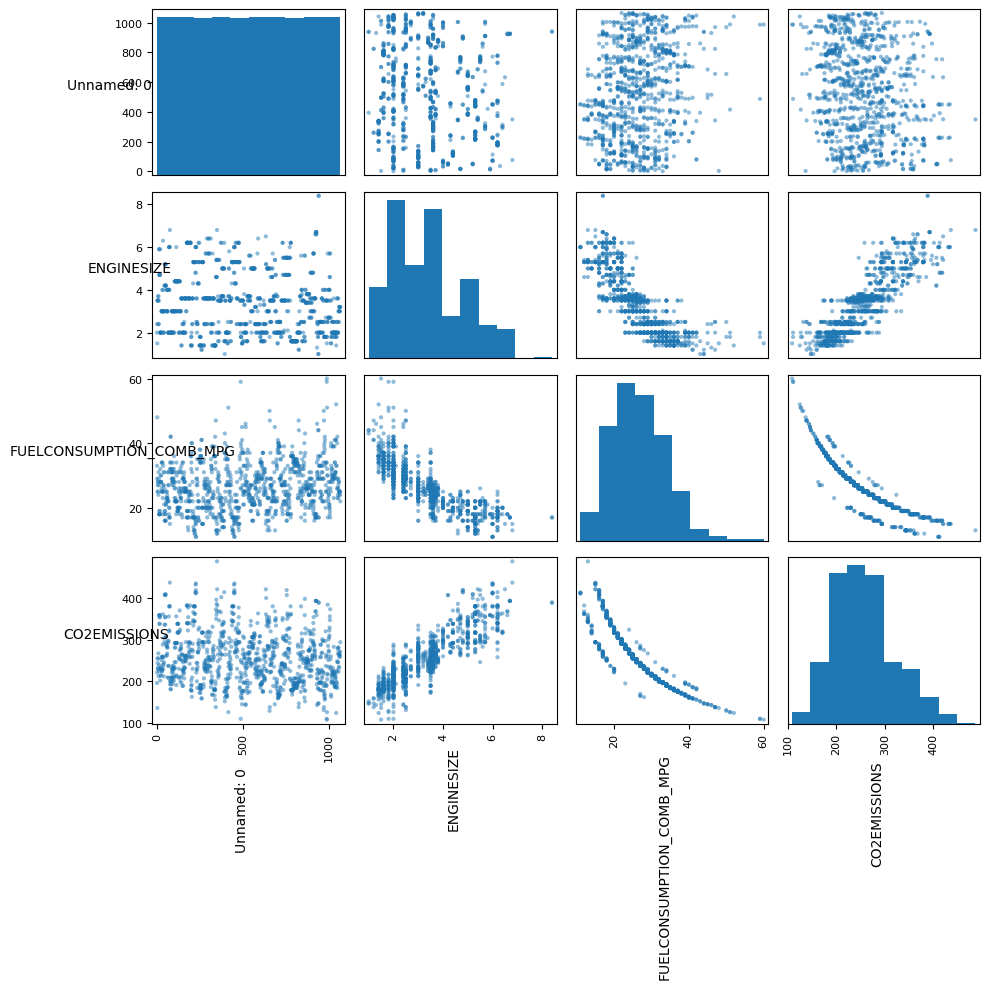

In [88]:
axes = pd.plotting.scatter_matrix(df, figsize=(10, 10), alpha=0.5)
for ax in axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=90)
    ax.set_ylabel(ax.get_ylabel(), rotation=0)
    ax.xaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

In [89]:
# Prepare featureds (X) and target (y) variable
X = df.iloc[:, [0,1]].to_numpy()    # Features: ENGINESIZE and Fuel Consumption
y = df.iloc[:, [2]].to_numpy()       # Target: CO2EMISSIONS

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (1067, 2)
Target shape: (1067, 1)


In [90]:
# Standardize the features for better model performance
std_scalar = preprocessing.StandardScaler()
X_std = std_scalar.fit_transform(X)

print(pd.DataFrame(X_std).describe())

                 0             1
count  1067.000000  1.067000e+03
mean      0.000000  2.663703e-17
std       1.000469  1.000469e+00
min      -1.730428 -1.657890e+00
25%      -0.865214 -9.512918e-01
50%       0.000000  3.794572e-02
75%       0.865214  6.738841e-01
max       1.730428  3.570937e+00


In [91]:
# Train the Multiple Linear Regression model
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

coef_ = regressor.coef_
intercept_ = regressor.intercept_
print("Coefficients:", coef_)
print("Intercept:", intercept_)

Coefficients: [[ 0.55177822 -5.87264221]]
Intercept: [26.34672202]


In [92]:
# Calculate original coefficients and intercept for interpretation
mean_ = std_scalar.mean_
std_devs_ = np.sqrt(std_scalar.var_)
original_coef = coef_ / std_devs_
original_intercept = intercept_ - np.sum((mean_ * coef_) / std_devs_)

print("Original Coefficients:", original_coef)
print("Original Intercept:", original_intercept)

Original Coefficients: [[ 1.79139332e-03 -4.14959857e+00]]
Original Intercept: [39.27770292]


In [93]:
# Prepare data for 3D plotting
X1 = X_test[:, 0] if X_test.ndim > 1 else X_test
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)

# Create a meshgrid for plotting the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100), 
                               np.linspace(X2.min(), X2.max(), 100))

# Calculate corresponding y values on the regression plane
y_surf = (intercept_ + coef_[0,0] * x1_surf + coef_[0,1] * x2_surf)

# Predict y values for test set
y_pred = regressor.predict(X_test.reshape(-1, 1)) if X_test.ndim == 1 else regressor.predict(X_test)
above_plane = y_test > y_pred
below_plane = y_test <= y_pred
above_plane = above_plane[:, 0] if above_plane.ndim > 1 else above_plane
below_plane = below_plane[:, 0] if below_plane.ndim > 1 else below_plane

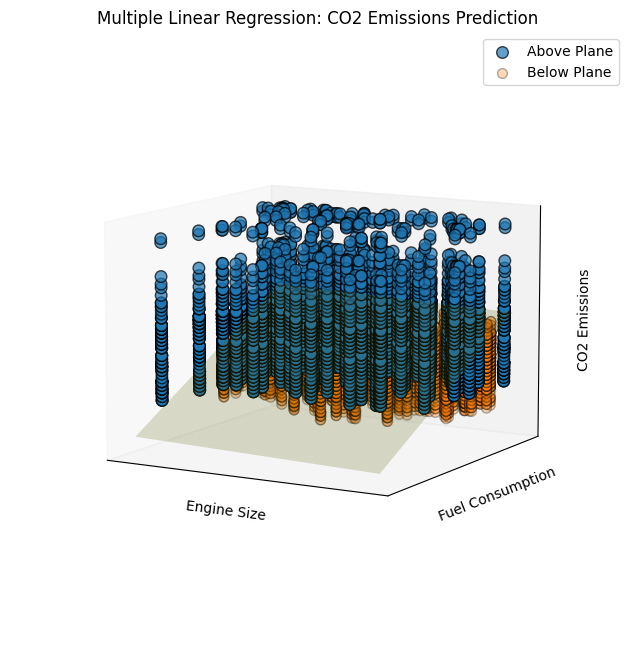

In [94]:
# Create 3D plot
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane], s=70, alpha=0.7, ec='k', label='Above Plane')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane], s=50, alpha=0.3, ec='k', label='Below Plane')

# Create grid to plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='y', alpha=0.2)
ax.view_init(elev=10, azim=120)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.8)

ax.set_xlabel('Engine Size')
ax.set_ylabel('Fuel Consumption')
ax.set_zlabel('CO2 Emissions')
plt.title('Multiple Linear Regression: CO2 Emissions Prediction')
plt.legend()
plt.show()

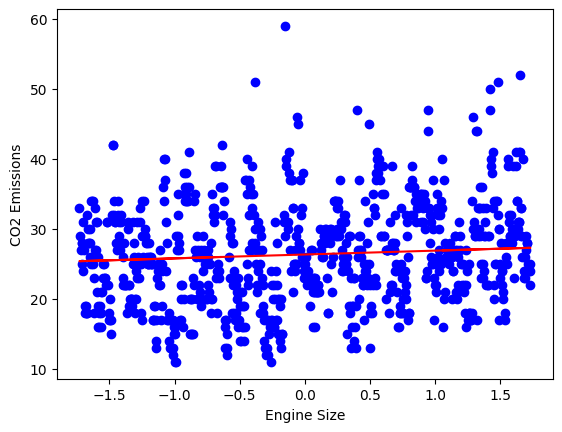

In [95]:
# Plotting the relationship between Engine Size and CO2 emissions
plt.scatter(X_train[:, 0], y_train, color='blue')
plt.plot(X_train[:, 0], coef_[0,0] * X_train[:, 0] + intercept_[0], color='red')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

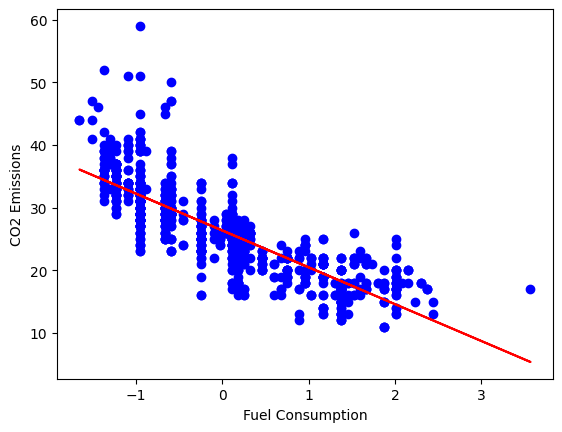

In [96]:
# Plotting the relationship between Fuel Consumption and CO2 emissions
plt.scatter(X_train[:, 1], y_train, color='blue')
plt.plot(X_train[:, 1], coef_[0,1] * X_train[:, 1] + intercept_[0], color='red')
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emissions")
plt.show()

In [97]:
# Perform simple linear regression using only Engine Size as the feature
X_train_engine_size = X_train[:, 0].reshape(-1, 1)  # Reshape to 2D array for sklearn
regressor_engine_size = LinearRegression()
regressor_engine_size.fit(X_train_engine_size, y_train)
coef_engine_size = regressor_engine_size.coef_
intercept_engine_size = regressor_engine_size.intercept_
print("Engine Size Coefficient:", coef_engine_size)
print("Engine Size Intercept:", intercept_engine_size)

Engine Size Coefficient: [[1.52338961]]
Engine Size Intercept: [26.29870163]


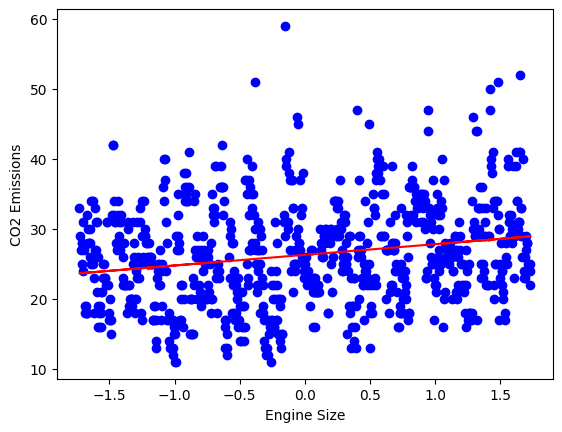

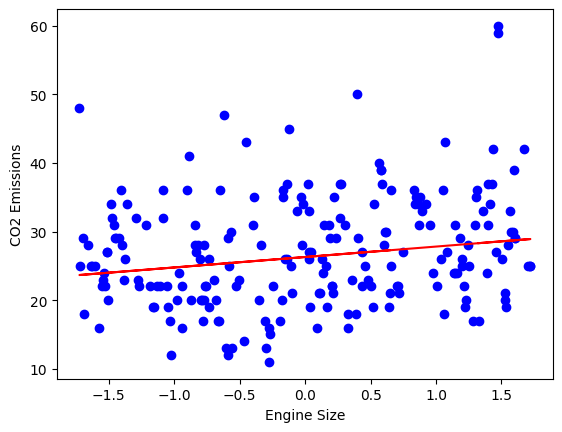

In [98]:
# Plot simple linear regression results for Engine Size
plt.scatter(X_train_engine_size, y_train, color='blue')
plt.plot(X_train_engine_size, coef_engine_size[0] * X_train_engine_size + intercept_engine_size, color='red')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

X_test_engine_size = X_test[:, 0].reshape(-1, 1)  # Reshape to 2D array for sklearn
plt.scatter(X_test_engine_size, y_test, color='blue')
plt.plot(X_test_engine_size, coef_engine_size[0] * X_test_engine_size + intercept_engine_size, color='red')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

In [99]:
# Perform simple linear regression using only Fuel Consumption as the feature
X_train_fuel_cons = X_train[:, 1].reshape(-1, 1)  # Reshape to 2D array for sklearn
regressor_fuel_cons = LinearRegression()
regressor_fuel_cons.fit(X_train_fuel_cons, y_train)
coef_fuel_cons = regressor_fuel_cons.coef_
intercept_fuel_cons = regressor_fuel_cons.intercept_
print("Fuel Consumption Coefficient:", coef_fuel_cons)
print("Fuel Consumption Intercept:", intercept_fuel_cons)

Fuel Consumption Coefficient: [[-5.96421972]]
Fuel Consumption Intercept: [26.34549172]


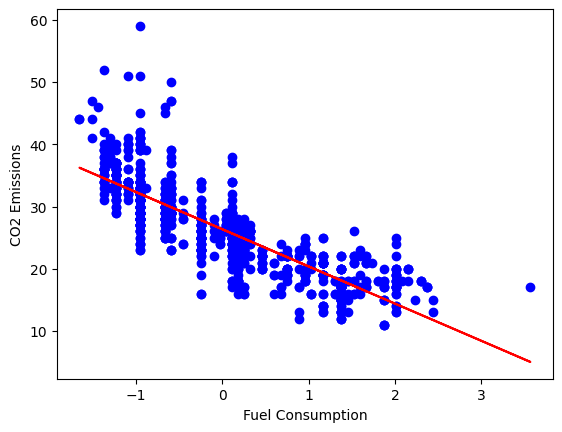

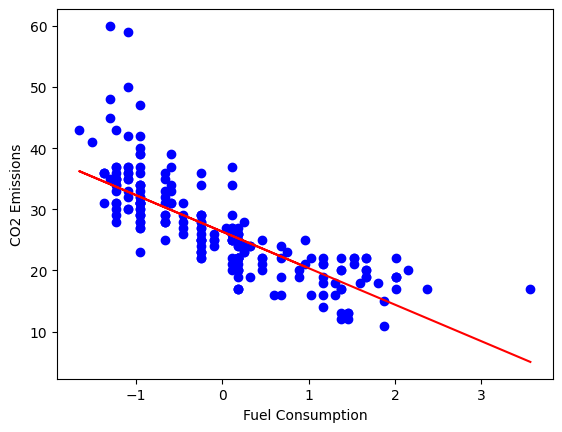

In [100]:
# Plot simple linear regression results for Fuel Consumption
plt.scatter(X_train_fuel_cons, y_train, color='blue')
plt.plot(X_train_fuel_cons, coef_fuel_cons[0] * X_train_fuel_cons + intercept_fuel_cons, color='red')
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emissions")
plt.show()


X_test_fuel_cons = X_test[:, 1].reshape(-1, 1)  # Reshape to 2D array for sklearn
plt.scatter(X_test_fuel_cons, y_test, color='blue')
plt.plot(X_test_fuel_cons, coef_fuel_cons[0] * X_test_fuel_cons + intercept_fuel_cons, color='red')
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emissions")
plt.show()